INFORMATION DIFFUSION IN SOCIAL NETWORKS-EMAIL ENRON DATASET

In [1]:
!pip install networkx matplotlib pandas


Load and Parse the Dataset

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Load the email dataset
with open('/content/Email-Enron.txt', 'r') as f:
    for line in f:
        if not line.startswith("#"):  # Ignore comment lines
            from_node, to_node = map(int, line.split())  # Split each line into from and to nodes
            G.add_edge(from_node, to_node)  # Add a directed edge to the graph

# Print basic stats
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())


Number of nodes: 36692
Number of edges: 367662


 Centrality Measures

In-Degree and Out-Degree Centrality

In [3]:
in_degree_centrality = nx.in_degree_centrality(G)
out_degree_centrality = nx.out_degree_centrality(G)

# Top 5 nodes by in-degree and out-degree centrality
top_5_in_degree = sorted(in_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_5_out_degree = sorted(out_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 nodes by in-degree centrality:", top_5_in_degree)
print("Top 5 nodes by out-degree centrality:", top_5_out_degree)


Top 5 nodes by in-degree centrality: [(5038, 0.03769316726172631), (273, 0.037257093020086667), (458, 0.034368101169224057), (140, 0.033932026927584416), (1028, 0.03390477228748194)]
Top 5 nodes by out-degree centrality: [(5038, 0.03769316726172631), (273, 0.037257093020086667), (458, 0.034368101169224057), (140, 0.033932026927584416), (1028, 0.03390477228748194)]


 Betweenness Centrality

In [4]:
import networkx as nx

# Assuming G is your graph
betweenness_centrality = nx.betweenness_centrality(G, normalized=True, k=1000)  # Sample 1000 nodes
top_5_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by betweenness centrality:", top_5_betweenness)


Top 5 nodes by betweenness centrality: [(5038, 0.06648568481678155), (140, 0.055839429903562804), (588, 0.03774447192451946), (566, 0.037381516463176445), (458, 0.03640307958920567)]


Closeness Centrality

In [5]:
!pip install python-igraph


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.8 MB/s eta 0:00:00


In [6]:
from igraph import Graph

# Convert the NetworkX graph to an igraph graph
edges = list(G.edges())
igraph_graph = Graph(edges=edges)

# Calculate closeness centrality using igraph
closeness_centrality = igraph_graph.closeness()
top_5_closeness = sorted(enumerate(closeness_centrality), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by closeness centrality (using igraph):", top_5_closeness)


Top 5 nodes by closeness centrality (using igraph): [(2086, 1.0), (2087, 1.0), (4631, 1.0), (5012, 1.0), (5013, 1.0)]


 Community Detection

Girvan-Newman

In [7]:
!pip install python-louvain



In [9]:
import random
import networkx as nx

# Sample a subset of nodes to create a smaller graph
sample_size = 1000  # Adjust based on your requirements
sampled_nodes = random.sample(G.nodes(), sample_size)
subgraph = G.subgraph(sampled_nodes)

# Apply Girvan-Newman on the subgraph
from networkx.algorithms.community import girvan_newman

communities = girvan_newman(subgraph)
top_level_communities = next(communities)
sorted_communities = sorted(map(sorted, top_level_communities))

print("Detected communities in the subgraph:", sorted_communities)


<ipython-input-9-e565084a09ba>:6: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sampled_nodes = random.sample(G.nodes(), sample_size)


Detected communities in the subgraph: [[11], [18], [151, 265, 293, 403, 525, 533, 539, 673, 803, 816, 1063, 1149, 1210, 1228, 1291, 1334, 1389, 1783, 2218, 2600, 2783, 3122, 4221, 4349, 5521, 5666, 5669, 5716, 6305, 6797, 7308, 8225, 8962, 9123, 10299, 10348, 13256, 14029, 16191, 16382, 16787, 17136, 20855, 26275, 29099, 29674], [163], [185, 408, 495, 499, 611, 694, 791, 794, 918, 1106, 1198, 1388, 1544, 1619, 1775, 2471, 2981, 2993, 3188, 3197, 3370, 4689, 4758, 4838, 5217, 6986, 7082, 7281, 7799, 7840, 9355, 9534, 9538, 10585, 12012, 12363, 12503, 15981, 18718, 18719, 18997, 20616, 21410, 21421, 23635, 23670, 25613], [253], [463], [679], [870], [961], [1002], [1082], [1131], [1175], [1232], [1346], [1514], [1618, 17712], [1627], [1778], [1942], [1953, 4395, 5514], [1959], [2034], [2129], [2145], [2169], [2190], [2193], [2311], [2355], [2430], [2462, 2465], [2506], [2545], [2574, 14107], [2658], [2687], [2737, 5017, 11165, 14570], [2800], [2809], [2819], [2872], [2914], [2950], [2978]

Louvian Method

In [38]:
import networkx as nx
import community as community_louvain  # Louvain method for community detection

# Assuming G is the graph created from your Enron email dataset

# Apply the Louvain method for community detection
partition = community_louvain.best_partition(G)

# Print detected communities
print("Detected Communities using Louvain Method:")
for community_id in set(partition.values()):
    community_nodes = [node for node, community in partition.items() if community == community_id]
    print(f"Community {community_id}: {community_nodes}")

# Optional: Calculate modularity score for the partition
modularity_score = community_louvain.modularity(partition, G)
print(f"\nModularity Score of the Louvain Partition: {modularity_score}")


Detected Communities using Louvain Method:
Community 0: [0, 1, 2, 8, 9, 14, 17, 18, 19, 20, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 43, 44, 47, 48, 51, 52, 57, 58, 59, 60, 61, 62, 63, 64, 66, 67, 68, 69, 212, 5033, 5050, 9132, 9136, 9498, 9499, 9500, 9501, 390, 2348, 5024, 5069, 5587, 8556, 8565, 8566, 9129, 9130, 9131, 9133, 9134, 9135, 887, 5023, 9137, 1970, 5025, 5026, 5027, 8559, 8560, 5049, 5064, 5065, 2112, 98, 104, 117, 142, 163, 360, 928, 1259, 1948, 1959, 1965, 1969, 2038, 2044, 9508, 5021, 1457, 8288, 8303, 1271, 9870, 4403, 4414, 7905, 10596, 20067, 1265, 2798, 1273, 2822, 2837, 2838, 2839, 2873, 2875, 2888, 2889, 10271, 14697, 14698, 11546, 11547, 8575, 8576, 8582, 8583, 8585, 8590, 8592, 8596, 8597, 8630, 8635, 8641, 12351, 12354, 12355, 12356, 12360, 12362, 4969, 4653, 2415, 3785, 4921, 4931, 4954, 5531, 5535, 5538, 5550, 5554, 5555, 5556, 5557, 5564, 5574, 5576, 5584, 5586, 5593, 5616, 4470, 4471, 4472, 4903, 4935, 4974, 4996, 5354, 6619, 

Link Prediction

Jaccard Coefficient

In [10]:
import random
import networkx as nx

# Sample a subset of nodes to create a smaller undirected graph
sample_size = 1000  # Adjust based on your needs
sampled_nodes = random.sample(G.nodes(), sample_size)
subgraph = G.subgraph(sampled_nodes).to_undirected()

# Compute the Jaccard Coefficient for each pair of nodes in the subgraph
jaccard = list(nx.jaccard_coefficient(subgraph))
sorted_jaccard = sorted(jaccard, key=lambda x: x[2], reverse=True)[:5]
print("Top 5 predicted links (Jaccard Coefficient) in the subgraph:", sorted_jaccard)


<ipython-input-10-75b4b0217c9d>:6: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sampled_nodes = random.sample(G.nodes(), sample_size)


Top 5 predicted links (Jaccard Coefficient) in the subgraph: [(2129, 2159, 1.0), (2129, 2182, 1.0), (2129, 2213, 1.0), (2159, 2182, 1.0), (2159, 2213, 1.0)]


Assortativity

In [11]:
degree_assortativity = nx.degree_assortativity_coefficient(G)
print("Degree Assortativity Coefficient:", degree_assortativity)
# The Degree Assortativity Coefficient measures the tendency of nodes in a network to connect with other nodes that have a similar degree (number of connections).
# This means that in the Enron email network, nodes with a high degree (many connections) are somewhat more likely to connect with nodes that have a low degree (few connections).


Degree Assortativity Coefficient: -0.11076403259610496


Clustering Coefficent

In [35]:
# Calculate clustering coefficient for each node
clustering_coefficients = nx.clustering(G)
print("Clustering Coefficient per Node:")
for node, coeff in clustering_coefficients.items():
    print(f"Node {node}: {coeff}")

# Calculate the average clustering coefficient for the entire graph
average_clustering_coefficient = nx.average_clustering(G)
print(f"\nAverage Clustering Coefficient for the Graph: {average_clustering_coefficient}")


Streaming output truncated to the last 5000 lines.
Node 33900: 1.0
Node 33901: 1.0
Node 29458: 0
Node 19008: 0
Node 19009: 0
Node 19010: 0
Node 19011: 0
Node 19012: 0
Node 28916: 1.0
Node 28917: 1.0
Node 28918: 1.0
Node 28930: 0.5333333333333333
Node 28932: 1.0
Node 19324: 0
Node 30474: 1.0
Node 30475: 1.0
Node 30463: 1.0
Node 30470: 1.0
Node 30471: 1.0
Node 28793: 0
Node 29436: 1.0
Node 29437: 1.0
Node 29438: 1.0
Node 28797: 1.0
Node 28798: 1.0
Node 28799: 0
Node 28625: 1.0
Node 28626: 1.0
Node 28627: 1.0
Node 28811: 1.0
Node 28812: 1.0
Node 28628: 1.0
Node 28629: 0.8333333333333334
Node 28630: 1.0
Node 28711: 1.0
Node 28712: 1.0
Node 28713: 1.0
Node 28639: 0
Node 28714: 1.0
Node 28715: 0.8333333333333334
Node 28716: 0.8333333333333334
Node 28717: 1.0
Node 29682: 0
Node 36061: 0
Node 19337: 0
Node 19338: 0
Node 19340: 0
Node 19341: 0
Node 19342: 0
Node 19343: 0
Node 19344: 0
Node 32857: 0
Node 19353: 0
Node 19354: 0
Node 28456: 0
Node 28457: 0
Node 19363: 0
Node 19364: 0
Node 29433: 1

 Network Visualization

<ipython-input-12-27e8a1f84cca>:7: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sampled_nodes = random.sample(G.nodes(), sample_size)


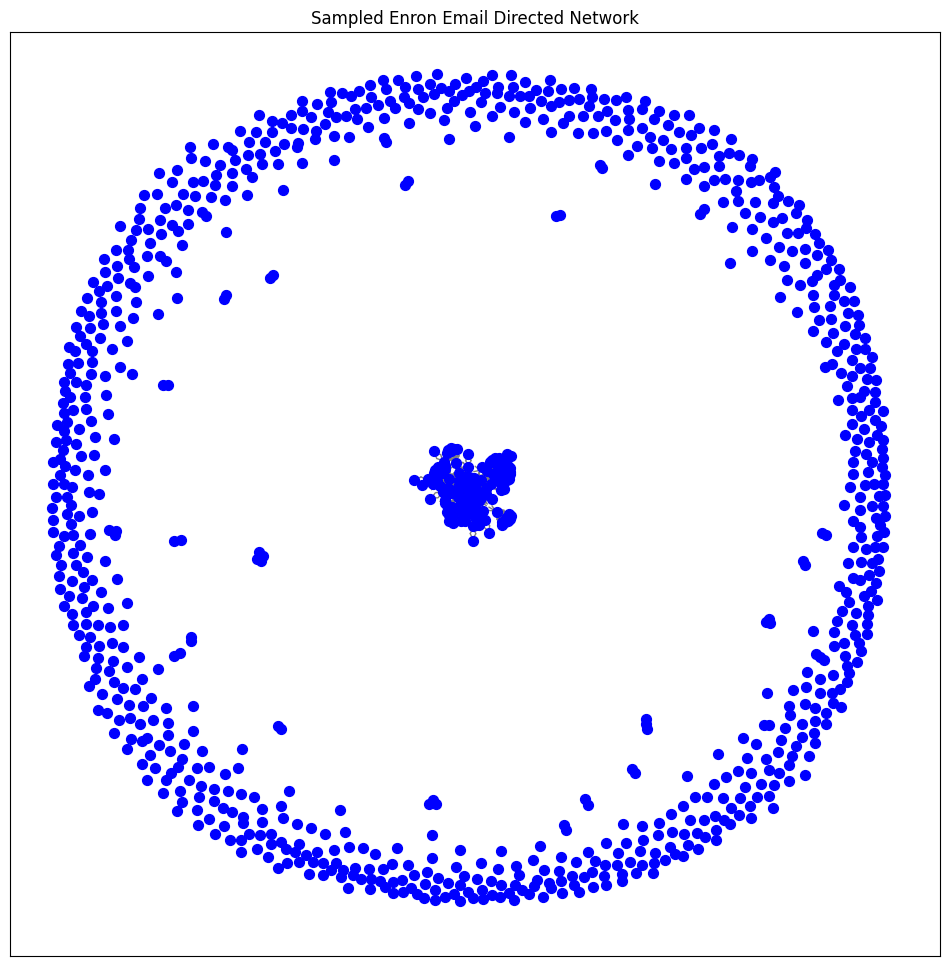

In [12]:
import random
import networkx as nx
import matplotlib.pyplot as plt

# Sample a subset of nodes to create a smaller directed graph
sample_size = 1000  # Adjust based on your needs
sampled_nodes = random.sample(G.nodes(), sample_size)
subgraph = G.subgraph(sampled_nodes)

# Draw the sampled directed network with a force-directed layout
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(subgraph)
nx.draw_networkx_nodes(subgraph, pos, node_size=50, node_color='blue')
nx.draw_networkx_edges(subgraph, pos, arrowstyle='->', arrowsize=10, edge_color='gray')
plt.title("Sampled Enron Email Directed Network")
plt.show()


 Information Diffusion Models

Independent Cascade Model (ICM)

Independent Cascade Model (ICM):Working

Step 1: Start by selecting a few key people in the Enron network (nodes in the graph) who send the first emails (they are the initial "infected" people).

Step 2: These people try to spread the information (emails) to their direct contacts (neighbors) in the network. Each time they send an email, there’s a certain chance the contact will receive and pass on the information.

Step 3: Once a person tries to spread the email, they cannot try again. The process continues until no new emails are spread in the network.

Goal: Identify which employees are most successful at spreading the email across the organization and how far it reaches.

 Independent Cascade Model (ICM):What conclusion can be made from it..

Key Influencers: Find people who are best at spreading information to others quickly.

Information Spreaders: Identify individuals who can cause an email (or rumor) to spread to many people.

Bottlenecks: Detect people who control the flow of information between different groups. If they don't share info, large parts of the network won’t know about it.

Viral Potential: See who could trigger a viral spread of information throughout the organization.

Here’s a concise summary in three points:

1. Susceptible (S): Nodes that have not yet received information and are potential recipients in the Enron email network.

2. Infected (I): Nodes that have received information and are actively spreading it to their connections, representing engaged users in the communication flow.

3. Recovered (R): Nodes that were once infected but have stopped spreading information, indicating users who are no longer actively participating in communication.

In [13]:
!pip install EoN


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for EoN: filename=EoN-1.2-py3-none-any.whl size=122467 sha256=017025373d071d2c78dd02f454ce76b1a8d87dc85a000a7946aba6fce855401f
  Stored in directory: /root/.cache/pip/wheels/5c/f5/1a/a0eb87d5be57c62526fbd133651c442482ea5a997d88382007
Successfully built EoN


In [15]:
import numpy as np

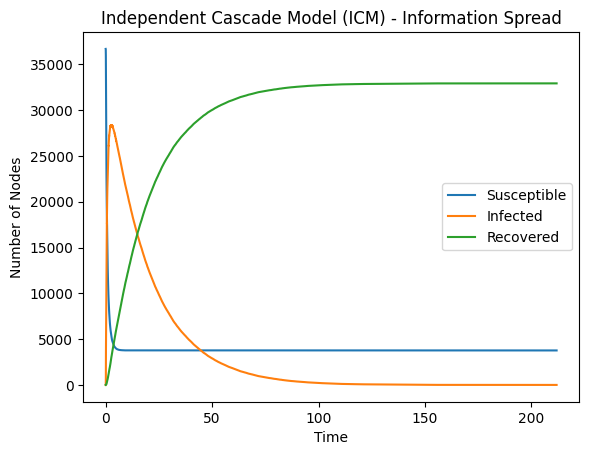

In [16]:
import EoN

# Choose a small fraction of nodes to be initially infected
initial_infected = [0, 1, 5]  # Example of initial spreaders

# Set up infection and recovery rates
tau = 0.8  # Transmission probability (infection rate)
gamma = 0.05  # Recovery rate

# Simulate the spread using Independent Cascade Model
t, S, I, R = EoN.fast_SIR(G, tau, gamma, initial_infecteds=initial_infected)


# Plot the results
import matplotlib.pyplot as plt

plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Number of Nodes')
plt.title('Independent Cascade Model (ICM) - Information Spread')
plt.legend()
plt.show()

# # Get the final set of active (infected) nodes
# simulated_icm_cascade = set(np.where(I[-1] > 0)[0])  # Active nodes at the last time step
# print("Simulated ICM Cascade:", simulated_icm_cascade)

In [17]:
print("Neighbors of initial infected nodes:")
for node in initial_infected:
    print(f"Node {node}: {list(G.neighbors(node))}")


Neighbors of initial infected nodes:
Node 0: [1]
Node 1: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70]
Node 5: [1, 56, 75, 86, 93, 106, 136, 140, 144, 145, 151, 188, 195, 212, 213, 301, 416, 443, 478, 566, 588, 647, 734, 823, 851, 919, 1330, 1359, 1365, 1371, 1672, 1725, 1768, 1793, 1824, 2718, 2737, 2753, 3027, 3237, 3311, 3334, 3844, 4153, 4398, 4746, 5030, 5033, 5036, 5048, 5050, 5061, 6917, 9132, 9136, 9498, 9499, 9500, 9501, 9502, 9503, 9504]


In [18]:
print("Final Susceptible:", S[-1])
print("Final Infected:", I[-1])
print("Final Recovered:", R[-1])


Final Susceptible: 3765
Final Infected: 0
Final Recovered: 32927


Independent Cascade Model (ICM) using degree centrality of nodes and choosing the top 10 as initial spreaders.

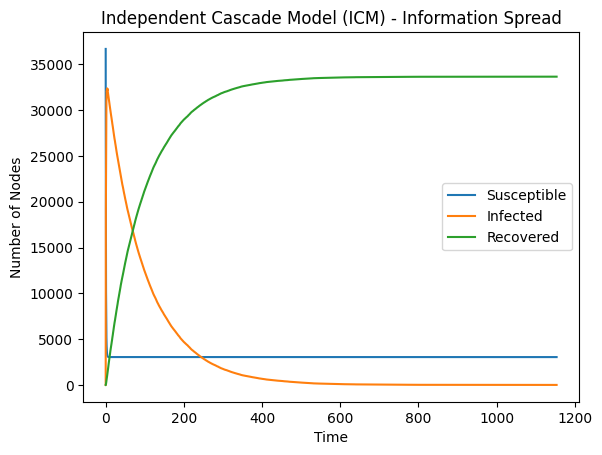

Final Susceptible: 3039
Final Infected: 0
Final Recovered: 33653


In [22]:
import numpy as np
import EoN
import networkx as nx
import matplotlib.pyplot as plt

# Calculate the degree centrality of nodes and choose the top 10 as initial spreaders
degree_centrality = nx.degree_centrality(G)
sorted_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)
initial_infected = sorted_nodes[:10]  # Select top 10 most connected nodes

# Increase infection rate and decrease recovery rate to encourage spread
tau = 1.0  # Higher transmission probability
gamma = 0.01  # Lower recovery rate

# Simulate the spread using SIR model
t, S, I, R = EoN.fast_SIR(G, tau, gamma, initial_infecteds=initial_infected)

# Plot the results
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Number of Nodes')
plt.title('Independent Cascade Model (ICM) - Information Spread')
plt.legend()
plt.show()

# Final counts for susceptible, infected, and recovered at the last time step
final_susceptible = S[-1]
final_infected = I[-1]
final_recovered = R[-1]

print(f"Final Susceptible: {final_susceptible}")
print(f"Final Infected: {final_infected}")
print(f"Final Recovered: {final_recovered}")


Indpendent cascade model(ICM) using some initial infected nodes

Using largest connected component with 33696 nodes.


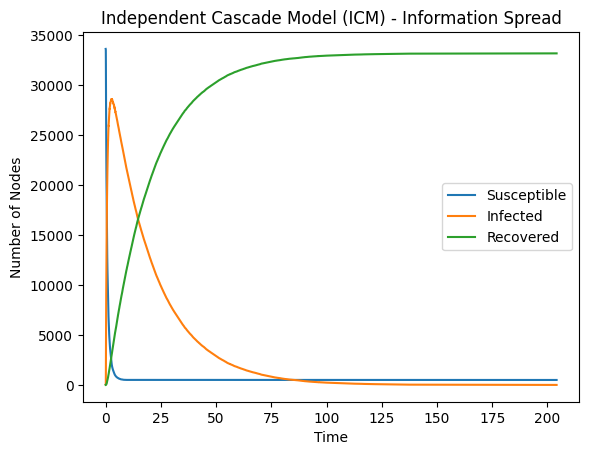

Final Susceptible: 496
Final Infected: 0
Final Recovered: 33200


In [24]:
import EoN
import networkx as nx
import random
import matplotlib.pyplot as plt

# Convert the directed graph to an undirected one for compatibility
G_undirected = G.to_undirected()

# If the graph is not connected, use the largest connected component
if not nx.is_connected(G_undirected):
    largest_cc = max(nx.connected_components(G_undirected), key=len)
    G_undirected = G_undirected.subgraph(largest_cc).copy()
    print("Using largest connected component with", G_undirected.number_of_nodes(), "nodes.")

# Choose some initial infected nodes
initial_infected = random.sample(list(G_undirected.nodes), 50)

# Set infection and recovery rates
tau = 0.8   # Infection probability
gamma = 0.05  # Recovery rate

# Run the SIR model on the undirected graph
t, S, I, R = EoN.fast_SIR(G_undirected, tau, gamma, initial_infecteds=initial_infected)

# Plot the results
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Number of Nodes')
plt.title('Independent Cascade Model (ICM) - Information Spread')
plt.legend()
plt.show()

# Print final numbers for each state
print(f"Final Susceptible: {S[-1]}")
print(f"Final Infected: {I[-1]}")
print(f"Final Recovered: {R[-1]}")


Linear Threshold Model (LTM)

Linear Threshold Model (LTM):Working

Step 1: Assign each employee (node) a threshold, representing how easily they can be influenced by others to spread an email (adopt information).

Step 2: Each employee will only forward the email if enough of their direct contacts (neighbors) have already sent it to them, and the influence they receive exceeds their personal threshold.

Step 3: The process continues with more employees adopting the information based on how much they are influenced by others, until no more employees are influenced.

Goal: Understand which employees need more peer pressure to spread emails and identify the minimum number of email senders required to make the entire organization informed.

Linear Threshold Model (LTM):What conclusion can we draw from it..

Influence by Peers: Identify people who need a lot of their colleagues to talk about something before they adopt or forward the information.

Hard-to-Influence People: Detect individuals who are slow to adopt new info unless influenced by many of their peers.

Critical Mass: Find out how many people need to adopt information before it spreads widely.

Community Dynamics: Show how information spreads within and between different departments or groups in the company.

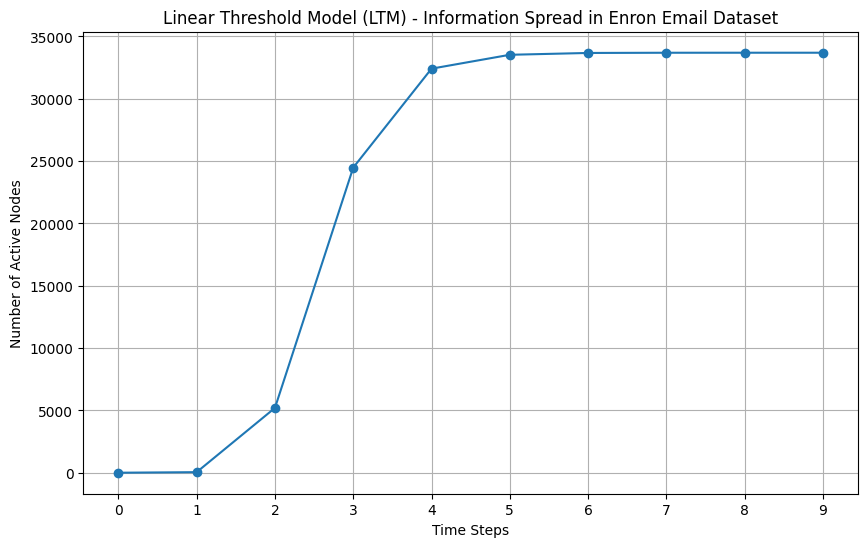

Node thresholds: {0: 0.8739058568559028, 1: 0.8300488743617095, 2: 0.8798634440795818, 3: 0.7747790212973218, 4: 0.40479759516773994, 5: 0.6936741521631562, 6: 0.8083557684176816, 7: 0.6659387323878964, 8: 0.7412243824834688, 9: 0.29796228261525504, 10: 0.5237525212505418, 11: 0.8117453612434224, 12: 0.30614556634877355, 13: 0.8548030796501964, 14: 0.6196453767308052, 15: 0.2160637391681829, 16: 0.33105620320656004, 17: 0.6511087410743779, 18: 0.5113672290212039, 19: 0.35839043987619723, 20: 0.7659823016636909, 21: 0.7855537664782203, 22: 0.518496584787051, 23: 0.7563426430774985, 24: 0.18009612311179818, 25: 0.6945383618375127, 26: 0.6171740459136121, 27: 0.5460393571719447, 28: 0.37999208496988135, 29: 0.4738630517653649, 30: 0.3950265581272887, 31: 0.7689651586944396, 32: 0.2001030525843711, 33: 0.21383845037193014, 34: 0.28676882674133986, 35: 0.8705405454584159, 36: 0.7488257958429566, 37: 0.260085275943605, 38: 0.46305528048483635, 39: 0.5430471847631768, 40: 0.8566522682113071, 

In [34]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Load the Enron email dataset from a text file
G = nx.Graph()

with open('/content/Email-Enron.txt', 'r') as file:
    for line in file:
        parts = line.strip().split()
        if len(parts) == 2:  # Ensure the line has exactly two parts
            try:
                from_node, to_node = map(int, parts)
                G.add_edge(from_node, to_node)
            except ValueError:
                continue  # Skip lines that cannot be converted to integers

# Set node thresholds for activation
thresholds = {node: random.uniform(0.1, 0.9) for node in G.nodes()}

# Function to simulate the Linear Threshold Model
def linear_threshold(G, initial_active, thresholds, max_steps=10):
    active_nodes = set(initial_active)
    history = [active_nodes.copy()]

    for step in range(max_steps):
        next_active = set()
        for node in G.nodes():
            if node not in active_nodes:
                active_neighbors = [n for n in G.neighbors(node) if n in active_nodes]
                total_weight = sum(G[node][n].get('weight', 1) for n in active_neighbors)
                if total_weight >= thresholds[node]:
                    next_active.add(node)
        active_nodes.update(next_active)
        history.append(active_nodes.copy())
        if not next_active:
            break

    return history

# Select random initial active nodes
initial_active = random.sample(list(G.nodes()), 5)

# Simulate the spread using the Linear Threshold Model
LT_model_result = linear_threshold(G, initial_active, thresholds)

# Prepare data for plotting
active_counts = [len(active) for active in LT_model_result]

# Plot the diffusion process
plt.figure(figsize=(10, 6))
plt.plot(active_counts, marker='o')
plt.xlabel('Time Steps')
plt.ylabel('Number of Active Nodes')
plt.title('Linear Threshold Model (LTM) - Information Spread in Enron Email Dataset')
plt.grid()
plt.xticks(range(len(active_counts)))
plt.show()

# Print the thresholds for understanding the model behavior
print("Node thresholds:", thresholds)




1. **Definition of Thresholds**: Each node has a threshold value representing the minimum cumulative weight of active neighbors required for it to become active.

2. **Susceptibility**:
   - Nodes with **lower thresholds** are **more susceptible** to activation, requiring less influence from neighbors.
   - Nodes with **higher thresholds**  are **more resistant** and require significantly more influence to become active.

3. **Cascading Effects**:
   - Nodes with lower thresholds are likely to activate first, potentially leading to a **chain reaction** that can influence nodes with higher thresholds.

4. **Network Dynamics**:
   - The thresholds indicate how information, behaviors, or infections might **spread** through the network, providing insight into the overall network dynamics.

5. **Key Influencers**:
   - Nodes with **low thresholds** serve as **critical points** for initiating information spread, while nodes with high thresholds may need targeted strategies for activation.

6. **Strategic Interventions**:
   - To promote activation effectively, focus on nodes with lower thresholds for early interventions (e.g., marketing strategies, information campaigns).

7. **Bottleneck Identification**:
   - High-threshold nodes can act as **bottlenecks** in the diffusion process, requiring careful planning to overcome resistance to activation.



Model Evaluation

<ipython-input-37-fad7f0ff8c51>:50: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  initial_active = random.sample(observed_cascade, 50)  # Randomly select 50 nodes as initial active


Observed Cascade (Active Nodes): 36692
Simulated Cascade (Active Nodes): 33715
Precision: 1.0000
Recall: 0.9189
F1 Score: 0.9577


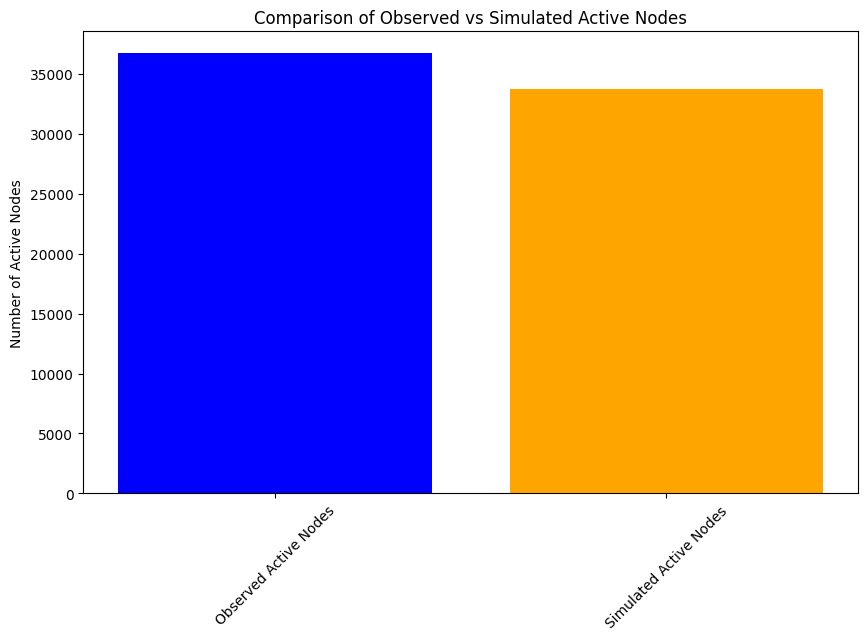

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random

# Load the Enron email dataset
edges = []
with open('/content/Email-Enron.txt', 'r') as file:
    for line in file:
        # Skip the header lines and only read actual edges
        if not line.startswith("FromNodeId"):
            parts = line.strip().split("\t")
            if len(parts) == 2:
                edges.append((int(parts[0]), int(parts[1])))

# Create a graph from the edges
G = nx.Graph()
G.add_edges_from(edges)

# Calculate observed cascade (nodes that sent or received at least one email)
observed_cascade = set(G.nodes)  # All nodes in the graph are considered active

# Set node thresholds for activation
thresholds = {node: random.uniform(0.1, 0.9) for node in G.nodes()}

# Function to simulate the Linear Threshold Model
def linear_threshold(G, initial_active, thresholds, max_steps=10):
    active_nodes = set(initial_active)
    history = [active_nodes.copy()]

    for step in range(max_steps):
        next_active = set()

        for node in G.nodes():
            if node not in active_nodes:
                active_neighbors = [n for n in G.neighbors(node) if n in active_nodes]
                total_weight = sum(G[node][n].get('weight', 1) for n in active_neighbors)
                if total_weight >= thresholds[node]:
                    next_active.add(node)

        active_nodes.update(next_active)
        history.append(active_nodes.copy())

        if not next_active:
            break

    return history

# Select initial active nodes (e.g., random selection from the observed cascade)
initial_active = random.sample(observed_cascade, 50)  # Randomly select 50 nodes as initial active

# Simulate the spread using Linear Threshold Model
LT_model_result = linear_threshold(G, initial_active, thresholds)

# Prepare data for evaluation
simulated_cascade = set()
for step in LT_model_result:
    simulated_cascade.update(step)

# Calculate evaluation metrics
def calculate_metrics(observed, simulated):
    true_positive = len(observed & simulated)
    false_positive = len(simulated - observed)
    false_negative = len(observed - simulated)

    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1_score

precision, recall, f1_score = calculate_metrics(observed_cascade, simulated_cascade)

# Print the evaluation results
print(f"Observed Cascade (Active Nodes): {len(observed_cascade)}")
print(f"Simulated Cascade (Active Nodes): {len(simulated_cascade)}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")

# Optional: Plot the results for visualization
plt.figure(figsize=(10, 6))
plt.bar(['Observed Active Nodes', 'Simulated Active Nodes'], [len(observed_cascade), len(simulated_cascade)], color=['blue', 'orange'])
plt.ylabel('Number of Active Nodes')
plt.title('Comparison of Observed vs Simulated Active Nodes')
plt.xticks(rotation=45)
plt.show()
